In [ ]:
import pickle
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import Input ,Dropout
from keras.models import Model
from keras.applications.resnet50 import ResNet50
import time
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.api.preprocessing.image import load_img, img_to_array
from keras.api.utils import to_categorical
import glob

(256, 256, 3)


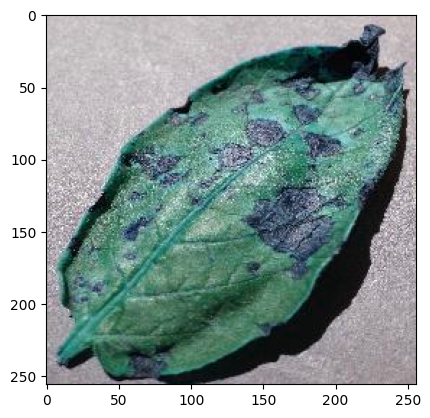

In [ ]:
DIR = "/kaggle/input/potato-dataset"
CATEGORIES = ['Potato___Early_blight', 'Healthy___potato', 'Potato___Late_blight']


for category in CATEGORIES:
    path = os.path.join(DIR, category)
    for image in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, image))
        plt.imshow(img_arr)
        print(img_arr.shape)
        break
    break



In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DIR, category)
        classes = CATEGORIES.index(category)

        for image in os.listdir(path):
            img = load_img(os.path.join(path, image), target_size=(224, 224))
            img_arr = img_to_array(img)
            img_arr = img_arr/255
            print("Shape: ", img_arr.shape)
            training_data.append([img_arr, classes])

print(img_arr.shape)

img_data = np.array(training_data)
img_data = img_data.astype('float32')
print (img_data.shape)


create_training_data()

(256, 256, 3)
(0,)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224,

In [ ]:
print(len(training_data))
import random

random.shuffle(training_data)

for sample in  training_data[:10]:
    print(sample[1])


3008
0
1
1
0
0
2
2
1
1
2


In [ ]:
features = []
labels = []


for x, y in training_data:
    features.append(x)
    labels.append(y)

features = np.array(features).reshape(-1, 224, 224, 3)

In [ ]:
import pickle

# dumping the features and labels
pickle_out = open("features.pkl","wb")
pickle.dump(features, pickle_out)
pickle_out.close()

pickle_out = open("labels.pkl","wb")
pickle.dump(labels, pickle_out)
pickle_out.close()

In [ ]:
pickle_in_features = open('features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)
y = to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2105, 224, 224, 3)
(2105, 3)


In [ ]:
num_classes = 3

image_input = Input(shape=(224, 224, 3))

model = ResNet50(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()

last_layer = model.get_layer('avg_pool').output
X = last_layer
d1 = Dropout(0.1)(X)
out = Dense(num_classes, activation='softmax', name='output_layer')(d1)
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 23,540,739 (89.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
for layer in custom_resnet_model.layers[:-1]:
    layer.trainable = False


custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model.fit(x_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)
print('Training time: %s' % (t - time.time()))


Epoch 1/15
53/53 - 23s - 431ms/step - accuracy: 0.3682 - loss: 1.1453 - val_accuracy: 0.5297 - val_loss: 1.0705
Epoch 2/15
53/53 - 3s - 59ms/step - accuracy: 0.4620 - loss: 1.0608 - val_accuracy: 0.5914 - val_loss: 1.0022
Epoch 3/15
53/53 - 3s - 59ms/step - accuracy: 0.4911 - loss: 1.0139 - val_accuracy: 0.5392 - val_loss: 0.9663
Epoch 4/15
53/53 - 3s - 59ms/step - accuracy: 0.5398 - loss: 0.9634 - val_accuracy: 0.4941 - val_loss: 0.9588
Epoch 5/15
53/53 - 3s - 58ms/step - accuracy: 0.5564 - loss: 0.9383 - val_accuracy: 0.7007 - val_loss: 0.9000
Epoch 6/15
53/53 - 3s - 59ms/step - accuracy: 0.5932 - loss: 0.9067 - val_accuracy: 0.5843 - val_loss: 0.8844
Epoch 7/15
53/53 - 3s - 58ms/step - accuracy: 0.5843 - loss: 0.8952 - val_accuracy: 0.5891 - val_loss: 0.8689
Epoch 8/15
53/53 - 3s - 58ms/step - accuracy: 0.6295 - loss: 0.8663 - val_accuracy: 0.5843 - val_loss: 0.8548
Epoch 9/15
53/53 - 3s - 59ms/step - accuracy: 0.6140 - loss: 0.8544 - val_accuracy: 0.6532 - val_loss: 0.8299
Epoch 10

In [ ]:
# Predict the classes for the test data
y_pred = custom_resnet_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it to multiclass format
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Generate a classification report
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test_classes, y_pred_classes))

# Optionally, print the predicted classes
# print("Predicted classes:", y_pred_classes)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       312
           1       0.66      0.83      0.74       283
           2       0.69      0.52      0.59       308

    accuracy                           0.72       903
   macro avg       0.72      0.73      0.72       903
weighted avg       0.73      0.72      0.72       903



In [ ]:
(loss, accuracy) = custom_resnet_model.evaluate(x_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7472 - loss: 0.7465
[INFO] loss=0.7589, accuracy: 72.4252%


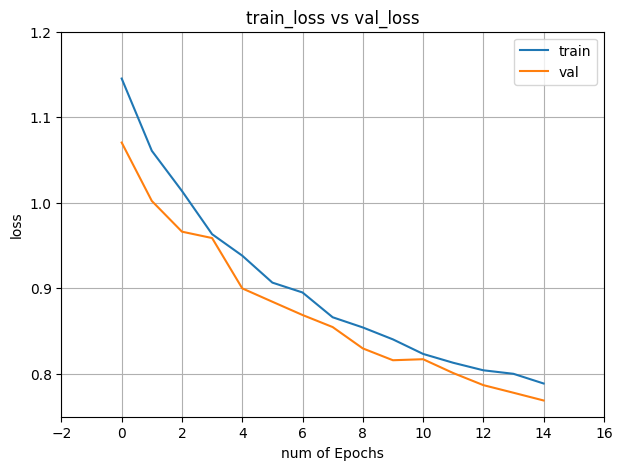

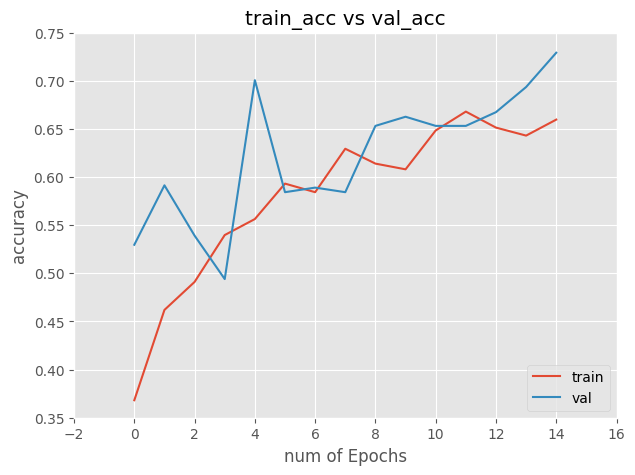

In [ ]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(15)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['ggplot'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

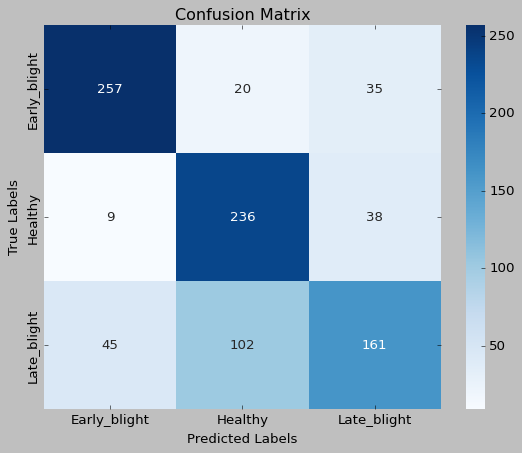

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test_classes and y_pred_classes are already defined
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Early_blight', 'Healthy', 'Late_blight'],
            yticklabels=['Early_blight', 'Healthy', 'Late_blight'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
